In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import seaborn as sns
import random
import numpy as np
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import datatable as dt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
from torch.nn import functional as F
from torch.optim.lr_scheduler import _LRScheduler
from tqdm import tqdm
import pandas as pd
import os
import os, csv, time, random
import torch
import torch.utils.data as Data
import numpy as np
from torch import nn, optim



long_dress = pd.read_csv('dataset/H1_nav.csv')
loot = pd.read_csv('dataset/H2_nav.csv')
red_black = pd.read_csv('dataset/H3_nav.csv')
soldier = pd.read_csv('dataset/H4_nav.csv')


ModuleNotFoundError: No module named 'datatable'

In [ ]:
print("Shape of Long Dress Dataset:", long_dress.shape)
print("Shape of Loot Dataset:", loot.shape)
print("Shape of Red Black Dataset:", red_black.shape)
print("Shape of Soldier Dataset:", soldier.shape)


Shape of Long Dress Dataset: (9516, 10)
Shape of Loot Dataset: (10458, 10)
Shape of Red Black Dataset: (10197, 10)
Shape of Soldier Dataset: (10007, 10)


In [ ]:
print("Long Dress Data Sample", long_dress.head())

Long Dress Data Sample    FrameNumber       x       y       z   HMDRX     HMDRY     HMDRZ  \
0            1  0.0500  1.7868 -1.0947  6.9163  350.8206  359.9912   
1            2  0.0498  1.7871 -1.0951  6.9116  351.1272    0.0094   
2            3  0.0498  1.7872 -1.0955  6.8915  351.3081    0.0221   
3            4  0.0498  1.7870 -1.0961  6.9375  351.5385  359.9731   
4            5  0.0497  1.7865 -1.0969  7.1456  351.7421  359.8803   

  Participant Dataset  ViewFrame  
0      P01_V1      H1          1  
1      P01_V1      H1          2  
2      P01_V1      H1          3  
3      P01_V1      H1          4  
4      P01_V1      H1          5  


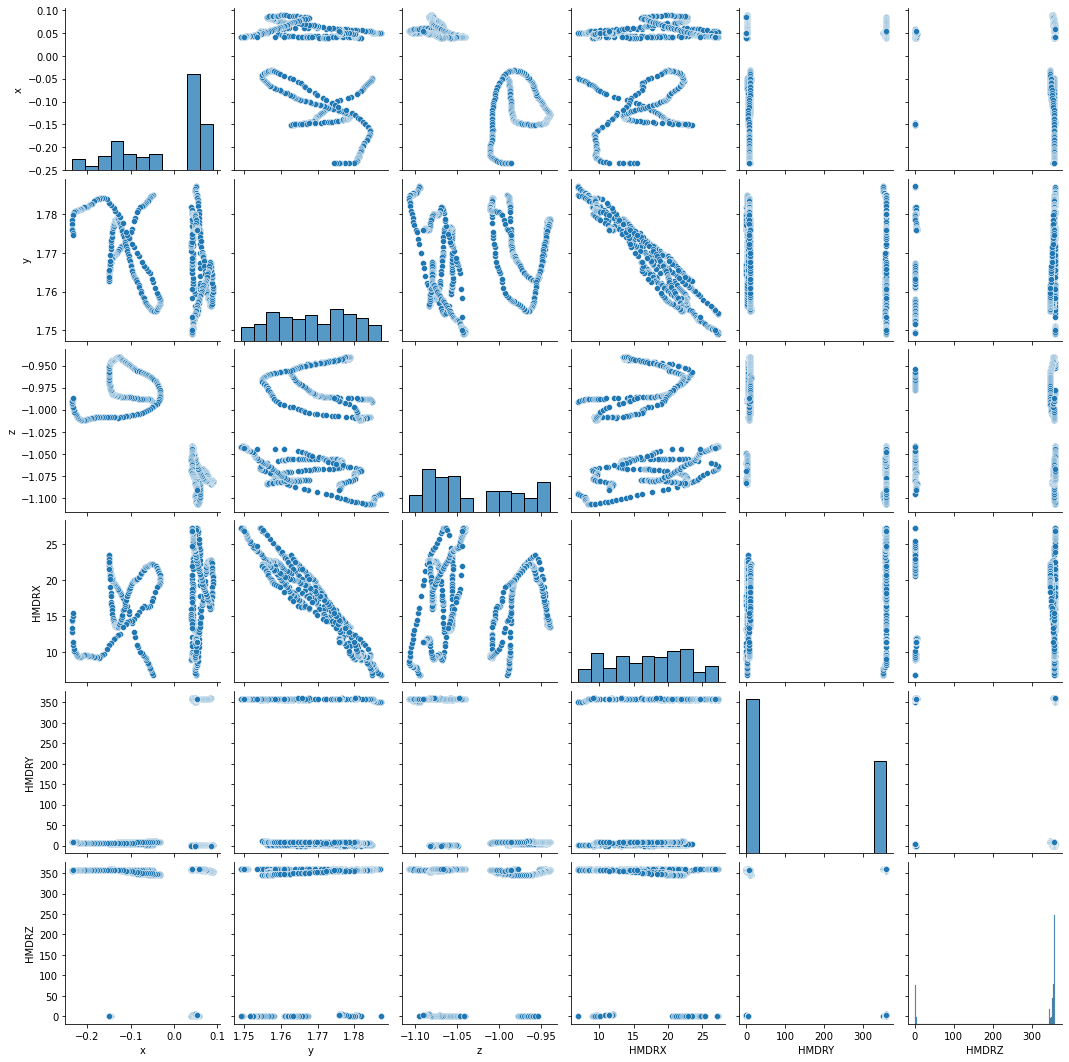

In [ ]:
plot = long_dress.iloc[:549,1:7]
# print(plot_dataset)
sns.pairplot(plot)
plt.show()

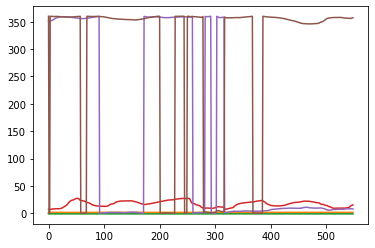

In [ ]:
plt.plot(plot)

In [ ]:
long_dress.describe()

,FrameNumber,x,y,z,HMDRX,HMDRY,HMDRZ,ViewFrame
count,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000
mean,68.825662,0.110921,1.782664,-0.534828,31.126297,149.035818,255.984014,211.652375
std,43.411518,0.433916,0.096304,0.379923,72.669971,160.376642,158.752008,164.896535
min,0.000000,-0.499700,1.415700,-1.376200,-0.004700,-0.005600,-0.003600,1.000000
25%,31.000000,-0.161225,1.725100,-0.801500,7.987275,8.524325,6.439625,89.000000
50%,65.000000,-0.002600,1.782400,-0.554650,14.810450,22.188050,354.369950,178.000000
75%,106.000000,0.234000,1.832900,-0.283700,21.478250,342.689175,357.576075,289.000000
max,149.000000,1.541400,1.976400,0.375400,359.991200,359.992900,359.991200,885.000000


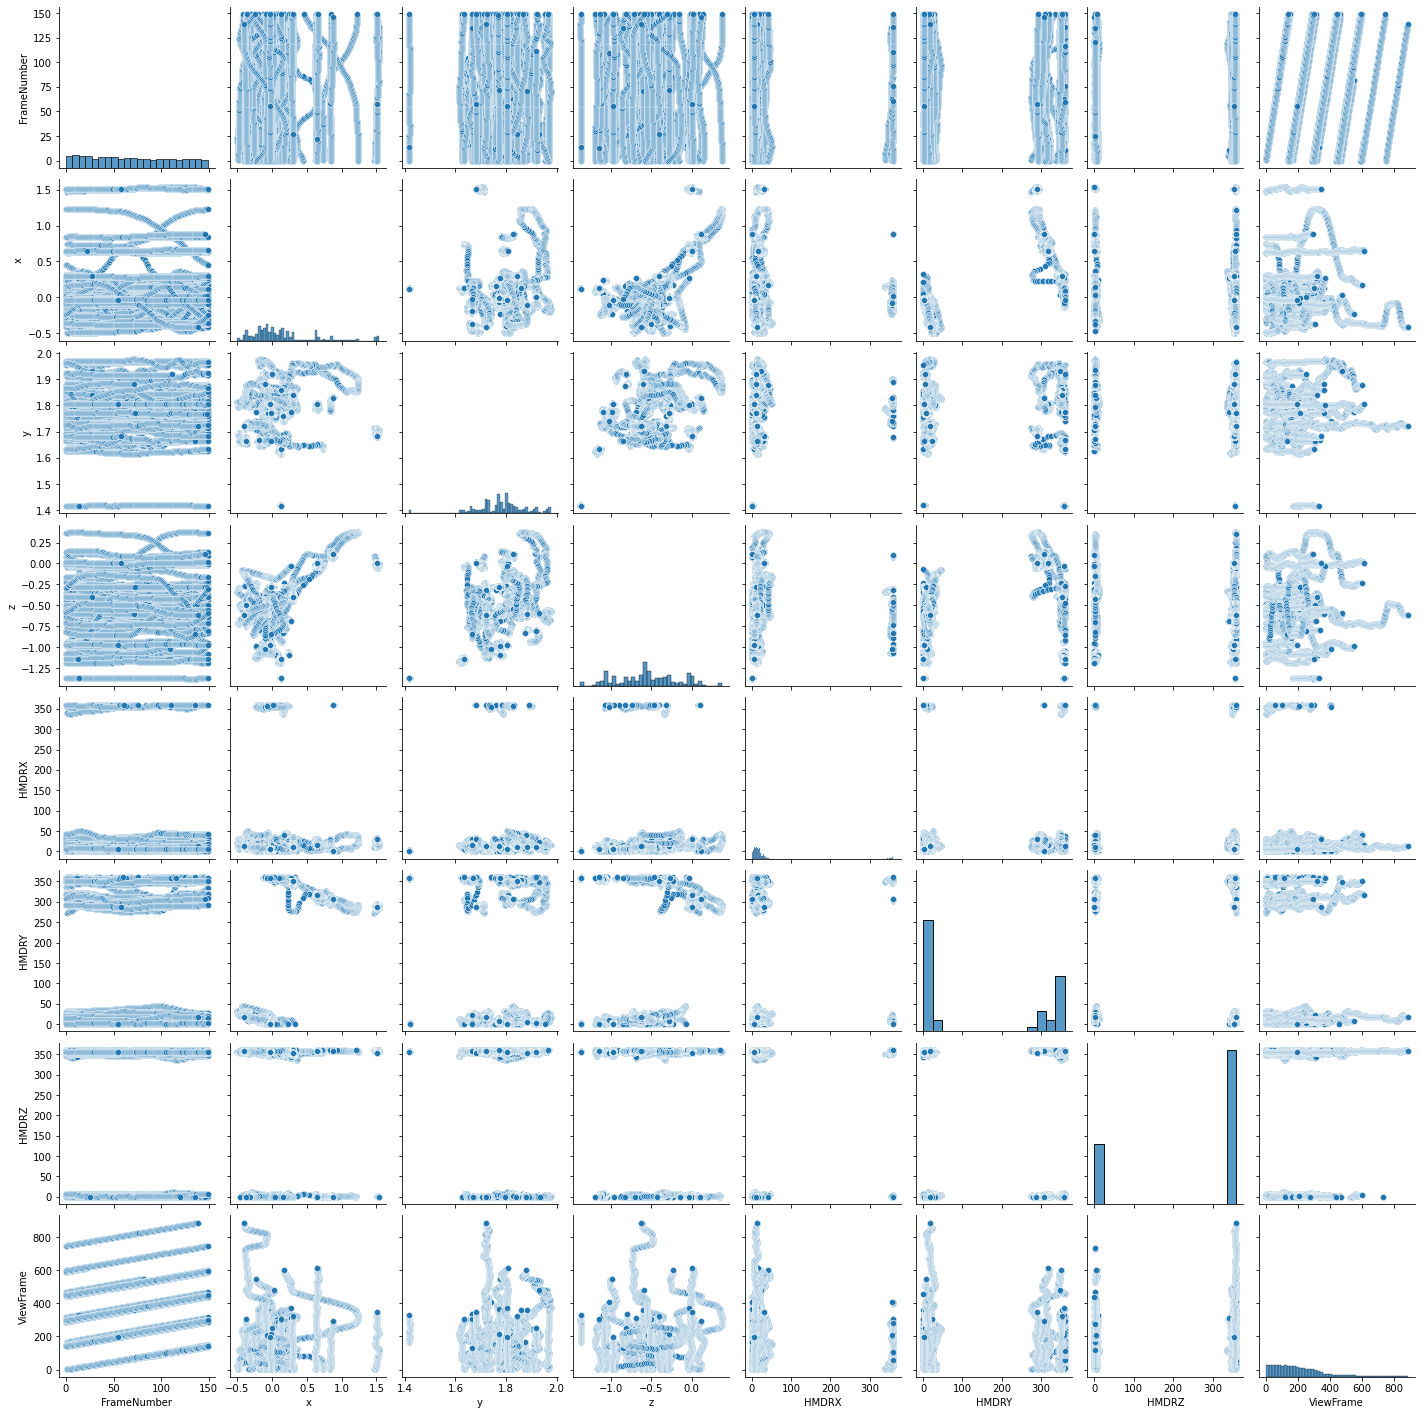

In [ ]:
sns.pairplot(long_dress)

In [ ]:
frame_150 = long_dress.iloc[:149,0:10]
print(frame_150)


     FrameNumber       x       y       z    HMDRX     HMDRY     HMDRZ  \
0              1  0.0500  1.7868 -1.0947   6.9163  350.8206  359.9912   
1              2  0.0498  1.7871 -1.0951   6.9116  351.1272    0.0094   
2              3  0.0498  1.7872 -1.0955   6.8915  351.3081    0.0221   
3              4  0.0498  1.7870 -1.0961   6.9375  351.5385  359.9731   
4              5  0.0497  1.7865 -1.0969   7.1456  351.7421  359.8803   
..           ...     ...     ...     ...      ...       ...       ...   
144          145  0.0833  1.7568 -1.0828  22.7533    1.6962  353.8865   
145          146  0.0837  1.7566 -1.0830  22.7908    1.7358  353.8468   
146          147  0.0843  1.7564 -1.0833  22.8564    1.8803  353.7779   
147          148  0.0850  1.7563 -1.0836  22.8374    2.0258  353.7277   
148          149  0.0852  1.7564 -1.0837  22.8417    2.0719  353.6909   

    Participant Dataset  ViewFrame  
0        P01_V1      H1          1  
1        P01_V1      H1          2  
2        P01

          x
0    0.0500
1    0.0498
2    0.0498
3    0.0498
4    0.0497
..      ...
544 -0.2347
545 -0.2347
546 -0.2346
547 -0.2343
548 -0.2340

[549 rows x 1 columns]


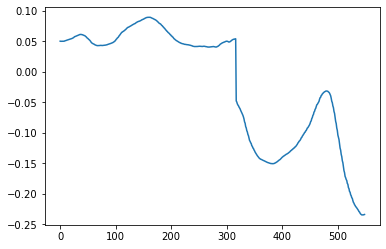

In [ ]:
participant = long_dress[long_dress['Participant'] == 'P01_V1']
participant = participant.iloc[::,1:2]
print(participant)
plt.plot(participant)
plt.show()

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(participant.iloc[:,1], participant.iloc[:,2], c=participant.iloc[:,2]);

          x
549  0.2338
550  0.2336
551  0.2334
552  0.2333
553  0.2331
..      ...
872  0.2377
873  0.2377
874  0.2377
875  0.2377
876  0.2376

[328 rows x 1 columns]


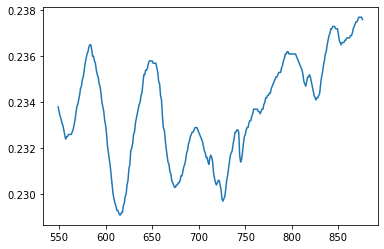

In [ ]:
participant = long_dress[long_dress['Participant'] == 'P02_V1']
participant = participant.iloc[::,1:2]
print(participant)
plt.plot(participant)
plt.show()

In [ ]:
frame_P01 = long_dress[long_dress['Participant'] == 'P01_V1']
frame_P01 = frame_P01.iloc[::,1:7]
print(frame_P01)


          x       y       z    HMDRX     HMDRY     HMDRZ
0    0.0500  1.7868 -1.0947   6.9163  350.8206  359.9912
1    0.0498  1.7871 -1.0951   6.9116  351.1272    0.0094
2    0.0498  1.7872 -1.0955   6.8915  351.3081    0.0221
3    0.0498  1.7870 -1.0961   6.9375  351.5385  359.9731
4    0.0497  1.7865 -1.0969   7.1456  351.7421  359.8803
..      ...     ...     ...      ...       ...       ...
544 -0.2347  1.7775 -0.9928  13.4230    8.2536  355.9264
545 -0.2347  1.7762 -0.9906  14.2977    8.4653  356.3082
546 -0.2346  1.7758 -0.9896  14.5123    8.4457  356.5488
547 -0.2343  1.7750 -0.9875  15.0098    8.2159  357.0574
548 -0.2340  1.7745 -0.9864  15.4411    7.9168  357.1393

[549 rows x 6 columns]


In [ ]:
train_size = int(len(frame_P01) * 0.80)
test_size = len(frame_P01) - train_size
train = frame_P01.iloc[0:train_size,:]
test = frame_P01.iloc[train_size:len(frame_P01),:]
print(len(train), len(test))
print(train)
print(test)

439 110
          x       y       z    HMDRX     HMDRY     HMDRZ
0    0.0500  1.7868 -1.0947   6.9163  350.8206  359.9912
1    0.0498  1.7871 -1.0951   6.9116  351.1272    0.0094
2    0.0498  1.7872 -1.0955   6.8915  351.3081    0.0221
3    0.0498  1.7870 -1.0961   6.9375  351.5385  359.9731
4    0.0497  1.7865 -1.0969   7.1456  351.7421  359.8803
..      ...     ...     ...      ...       ...       ...
434 -0.1085  1.7709 -0.9472  17.7984    9.5199  353.1977
435 -0.1078  1.7706 -0.9474  17.8153    9.4217  353.0085
436 -0.1056  1.7697 -0.9481  18.2019    9.4191  352.6220
437 -0.1046  1.7693 -0.9484  18.4652    9.4159  352.4561
438 -0.1027  1.7683 -0.9490  18.7213    9.4033  352.1429

[439 rows x 6 columns]
          x       y       z    HMDRX   HMDRY     HMDRZ
439 -0.1018  1.7680 -0.9493  18.9057  9.4052  352.0099
440 -0.0997  1.7669 -0.9501  19.2866  9.3707  351.7029
441 -0.0992  1.7666 -0.9504  19.3277  9.3640  351.6412
442 -0.0971  1.7656 -0.9511  19.6291  9.3369  351.2752
443 -0.09

In [ ]:
# train_dataset = np.reshape(train_dataset, (train_dataset.shape[0], 1, train_dataset.shape[1]))
# test_dataset = np.reshape(test_dataset, (test_dataset.shape[0], 1, test_dataset.shape[1]))

# train_dataset
# print(len(train_dataset))
# test_dataset
# print(len(test_dataset))
print(train.iloc[::,0:1])
print(train.iloc[::,1:2])
X = train.iloc[::,0:1]
y = train.iloc[::,1:2]

          x
0    0.0500
1    0.0498
2    0.0498
3    0.0498
4    0.0497
..      ...
434 -0.1085
435 -0.1078
436 -0.1056
437 -0.1046
438 -0.1027

[439 rows x 1 columns]
          y
0    1.7868
1    1.7871
2    1.7872
3    1.7870
4    1.7865
..      ...
434  1.7709
435  1.7706
436  1.7697
437  1.7693
438  1.7683

[439 rows x 1 columns]


In [ ]:
# n = 80
# X_test = X.head(int(len(X)*(80/100)))
# print(len(X_test))

X_train = X[:351]
y_train = y[:351]
X_val = X[351:]
y_val = y[351:]

In [ ]:
X_train

,x
0,0.0500
1,0.0498
2,0.0498
3,0.0498
4,0.0497
...,...
346,-0.1223
347,-0.1250
348,-0.1258
349,-0.1282


In [ ]:
print(X_train)
print(y_train)
print(X_val)
print(y_val)

          x
0    0.0500
1    0.0498
2    0.0498
3    0.0498
4    0.0497
..      ...
346 -0.1223
347 -0.1250
348 -0.1258
349 -0.1282
350 -0.1297

[351 rows x 1 columns]
          y
0    1.7868
1    1.7871
2    1.7872
3    1.7870
4    1.7865
..      ...
346  1.7715
347  1.7711
348  1.7710
349  1.7706
350  1.7704

[351 rows x 1 columns]
          x
351 -0.1318
352 -0.1333
353 -0.1350
354 -0.1364
355 -0.1377
..      ...
434 -0.1085
435 -0.1078
436 -0.1056
437 -0.1046
438 -0.1027

[88 rows x 1 columns]
          y
351  1.7700
352  1.7698
353  1.7696
354  1.7695
355  1.7694
..      ...
434  1.7709
435  1.7706
436  1.7697
437  1.7693
438  1.7683

[88 rows x 1 columns]


In [ ]:
input_size = 27
hidden_size = 512
num_layers = 48
batch_size = 225
epochs = 100
num_classes = 44

In [ ]:
X_train = torch.tensor(X_train.values)
y_train = torch.tensor(y_train.values)
X_val = torch.tensor(X_val.values)
y_val = torch.tensor(y_val.values)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

351
351
88
88


In [ ]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
def training_loop(n_epochs, optimiser, model, loss_fn, X_train,  X_val, y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        output_train = model(X_train) # forwards pass
        loss_train = loss_fn(output_train, y_train) # calculate loss
        output_val = model(X_val) 
        loss_val = loss_fn(output_val, y_val)
        
        optimiser.zero_grad() # set gradients to zero
        loss_train.backward() # backwards pass
        optimiser.step() # update model parameters
        if epoch == 1 or epoch % 10000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [ ]:
optimiser = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
    n_epochs = 50000, 
    optimiser = optimiser,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    X_train = X_train.float(),
    X_val = X_val.float(), 
    y_train = y_train.float(),
    y_val = y_val.float())

Epoch 1, Training loss 1.8243, Validation loss 1.9513
Epoch 10000, Training loss 0.0007, Validation loss 0.0081
Epoch 20000, Training loss 0.0006, Validation loss 0.0062
Epoch 30000, Training loss 0.0005, Validation loss 0.0048
Epoch 40000, Training loss 0.0004, Validation loss 0.0037
Epoch 50000, Training loss 0.0003, Validation loss 0.0028


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, 
out
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model


In [7]:
df = pd.read_csv(r'./dataset/H1_nav.csv',  encoding = 'utf8')
# MAE [1.327897870427836, 0.6940683958030475, 0.9348772063292176, 1.1812736815637395, 1.1281554071974593, 22.541354624604665]
# cross_val [0.8796283584810153, 0.5836110064051009, 0.5461870389664586, 0.9794998462462202, 0.5772626092840545, 22.193187113077187]

df = df.drop(['FrameNumber'], axis = 1)
df = df.drop(['ViewFrame'], axis = 1)
df = df.drop(['Dataset'], axis = 1)
df = df.drop(['Participant'], axis = 1)
size = 3 # end
angles = 6 # 
cross_val = 1

df

,x,y,z,HMDRX,HMDRY,HMDRZ
0,0.0500,1.7868,-1.0947,6.9163,350.8206,359.9912
1,0.0498,1.7871,-1.0951,6.9116,351.1272,0.0094
2,0.0498,1.7872,-1.0955,6.8915,351.3081,0.0221
3,0.0498,1.7870,-1.0961,6.9375,351.5385,359.9731
4,0.0497,1.7865,-1.0969,7.1456,351.7421,359.8803
...,...,...,...,...,...,...
9511,-0.0306,1.8041,-0.9720,6.7797,1.2876,355.3374
9512,-0.0304,1.8041,-0.9725,6.7526,1.2680,355.3192
9513,-0.0302,1.8041,-0.9727,6.7341,1.2694,355.3110
9514,-0.0300,1.8041,-0.9731,6.7192,1.2976,355.3169


In [8]:
x_scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))
y_scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))

X = df.iloc[:,:size]; 
y = df.iloc[:,size:]; 

X_s = x_scaler.fit_transform(X)
y_s = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2)

X_train = pd.DataFrame(X_train); X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train); y_test = pd.DataFrame(y_test)


In [9]:
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]) )
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

In [12]:
print(len(X_train))

7612


In [16]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 7612), activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(LSTM(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(angles, activation='linear'))

callbacks = [EarlyStopping(monitor='val_acc', patience = 10)]

model.compile(
    loss='mae',
    optimizer='Adam',
    metrics=['accuracy'])

model_f=model.fit(X_train,
            y_train,
            callbacks = callbacks,
            epochs=100,
            validation_split = 0.2)

y_pred = model.predict(X_test)

# load pretrained models for testing

#    model = load_model(r'.\FINAL RESULTS\LSTM\6DOF\dataset_myplace_with_constraints_no6_merged_plus3_LSTM.h5')
#    model.save(r'.\FINAL RESULTS\LSTM\3DOF\dataset_with_constraints_no6_3WRIST_15K.h5')

#           LSTM end
    
# Get training and test loss histories
training_loss = model_f.history['loss']
test_loss = model_f.history['val_loss']

# Get training and test accuracy histories
training_acc = model_f.history['accuracy']
test_acc = model_f.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.title('Loss')
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.legend(['Train', 'Test'])
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

# Visualize accuracy history
plt.figure()
plt.title('Acuracy')
plt.plot(epoch_count, training_acc)
plt.plot(epoch_count, test_acc)
plt.legend(['Train', 'Test'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy value')
plt.show()

y_pred = pd.DataFrame(y_scaler.inverse_transform(y_pred))
y_test = pd.DataFrame(y_scaler.inverse_transform(y_test))

result_mse = []
result_mae = []

for i in range(angles):

    mse = mean_squared_error(y_test.iloc[:,i], y_pred.iloc[:,i])
    rmse = sqrt(mse) 
    mae = mean_absolute_error(y_test.iloc[:,i], y_pred.iloc[:,i])
    result_mse.append(mse)
    result_mae.append(mae)

print("RMSE", result_mse)
print("MAE", result_mae)

# X_test_r = pd.DataFrame(x_scaler.inverse_transform( pd.DataFrame(np.reshape(X_test,(X_test.shape[0],X_test.shape[2]))) ))


NotImplementedError: Cannot convert a symbolic Tensor (lstm_3/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported